## Exploratory Data Analysis (EDA) for House Prices
This notebook explores the cleaned house price dataset, visualizes distributions, and investigates relationships between features and the target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


### Load the Cleaned Dataset
Read the cleaned house price data from CSV into a pandas DataFrame for analysis.

In [2]:
df = pd.read_csv('../Data/cleaned_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Check for Missing Values
Display the percentage of missing values in each column to ensure thal all of the data is clean.

In [3]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrArea     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
SalePrice      0.0
Length: 76, dtype: float64


### Basic Data Overview
Display the shape, info, and summary statistics of the dataset to understand its structure and contents.

In [4]:
# Basic info
print(df.shape)
print(df.info())
print(df.describe())



(1460, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

### Visualize SalePrice Distribution
Plot the distribution of the target variable `SalePrice` to check for skewness and outliers.

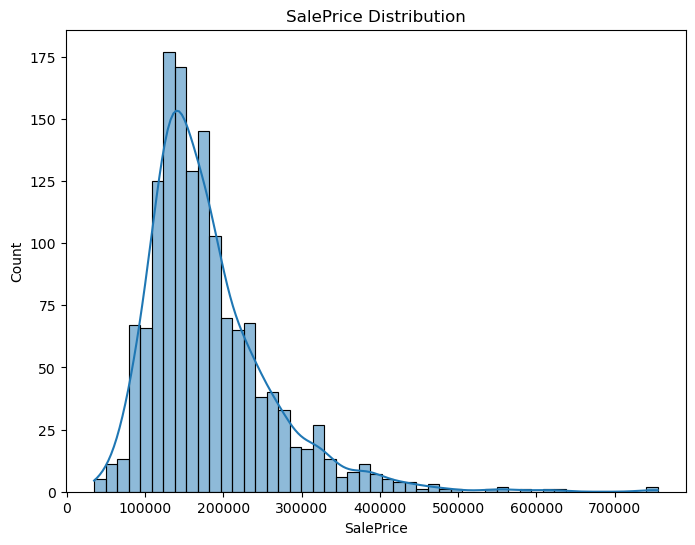

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.show()

### Check SalePrice Skewness
Calculate the skewness of the `SalePrice` distribution to determine if a transformation is needed.

In [6]:
print(f"SalePrice skewness: {skew(df['SalePrice']):.2f}")

SalePrice skewness: 1.88


### Log-Transform SalePrice to Fix Skewness
The original skewness of SalePrice is 1.88, which is considered too high for many statistical models. Therefore, we apply a log transformation to SalePrice to reduce skewness and make the distribution more normal.

In [7]:
df['SalePrice_log'] = np.log(df['SalePrice'])
y = df['SalePrice_log']
print(f"Fixed skewness of SalePrice: {skew(y):.2f}")

Fixed skewness of SalePrice: 0.12


### Compute Feature Correlations with SalePrice
Calculate the correlation of each numeric feature with `SalePrice` to identify important predictors.

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_with_saleprice = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

print(corr_with_saleprice)


SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Visualize Top Correlated Features
Plot the top 10 features most positively correlated with `SalePrice` to highlight key predictors.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9940\359863345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='viridis')


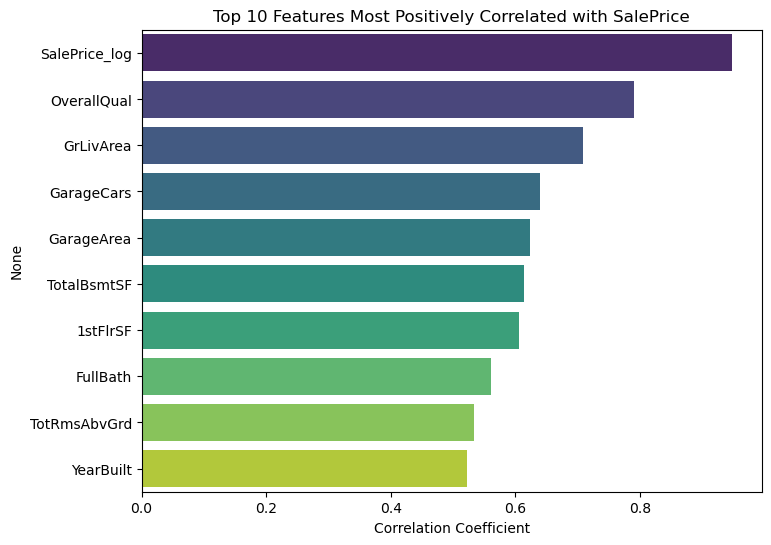

In [9]:
top_corr_features = corr_with_saleprice.drop('SalePrice').head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='viridis')
plt.title('Top 10 Features Most Positively Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.show()


### Boxplot: OverallQual vs SalePrice
Visualize the relationship between overall material/finish quality and house price using a boxplot.

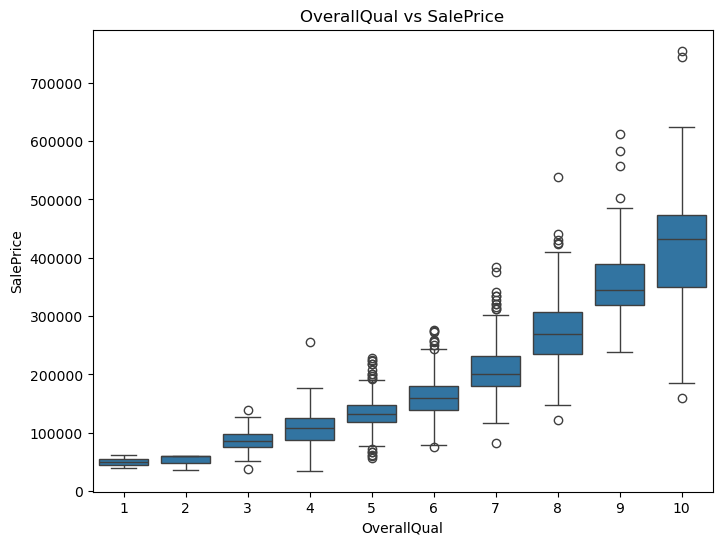

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()


### Boxplot: Neighborhood vs SalePrice
Visualize the distribution of house prices across different neighborhoods using a boxplot.

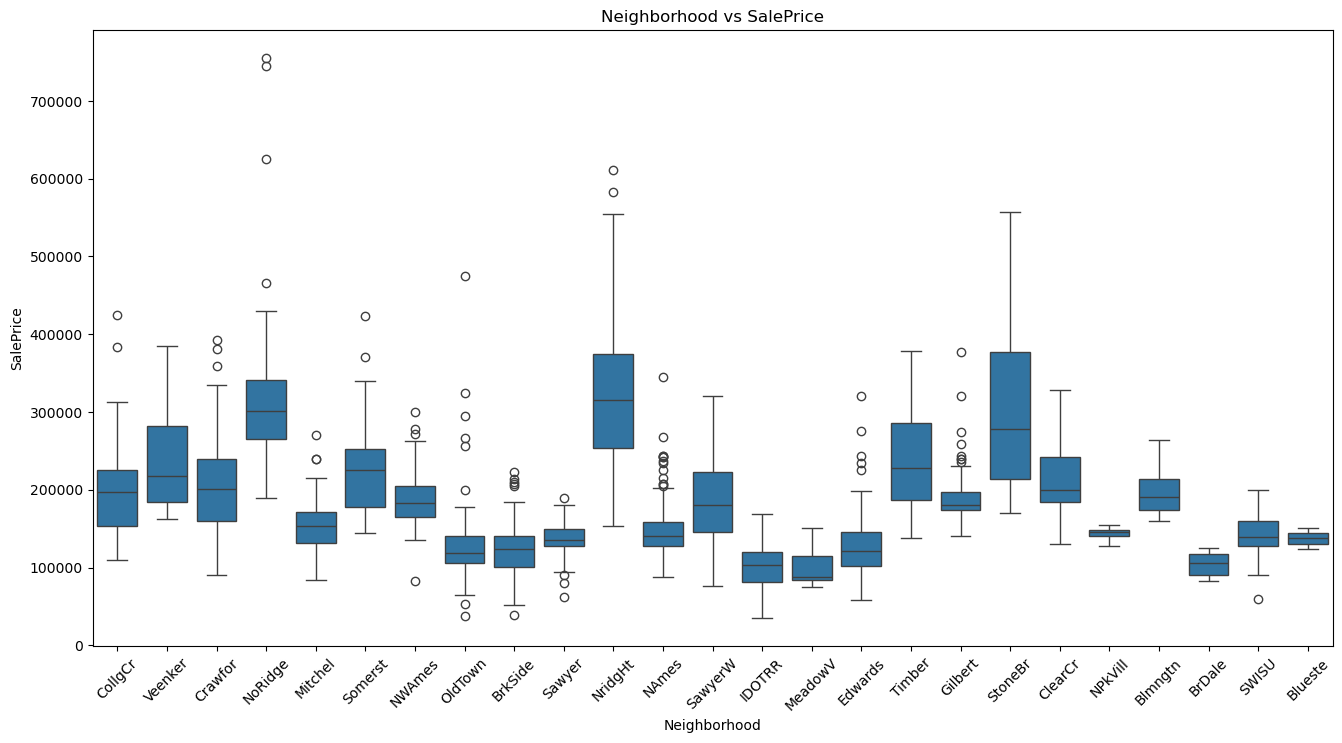

In [11]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Neighborhood vs SalePrice')
plt.show()


### Scatterplot: YearBuilt vs SalePrice
Explore the relationship between the year a house was built and its sale price using a scatterplot.

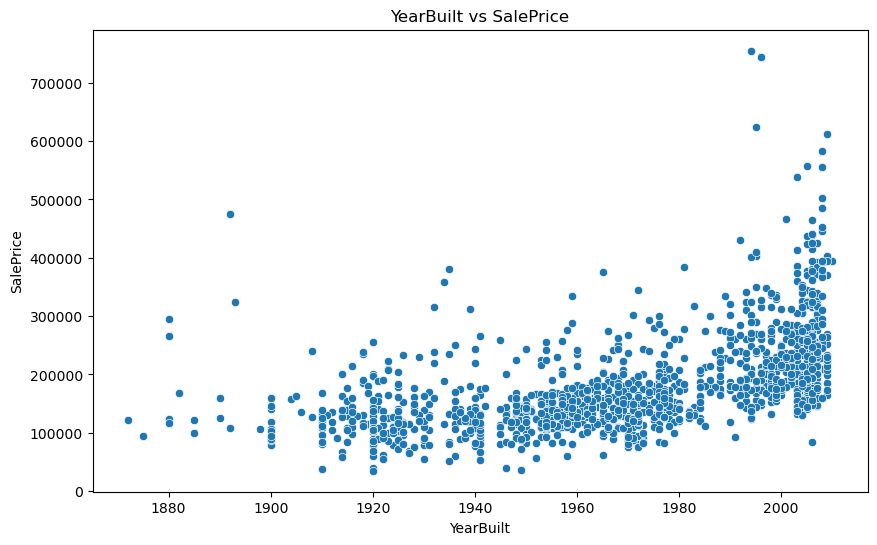

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.title('YearBuilt vs SalePrice')
plt.show()


### Visualize Log-Transformed SalePrice Distribution
Plot the distribution of the log-transformed `SalePrice` to confirm normalization and reduced skewness.

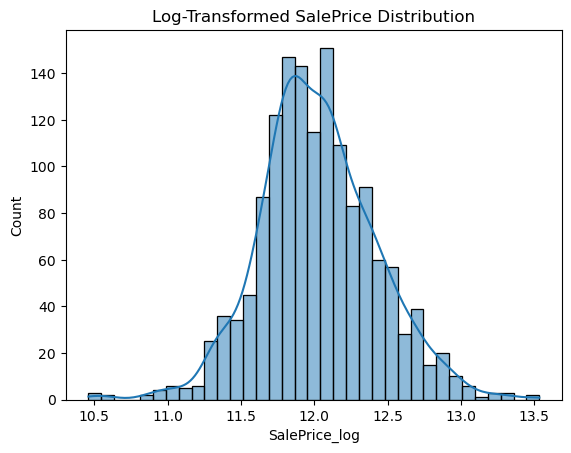

In [13]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

sns.histplot(df['SalePrice_log'], kde=True)
plt.title('Log-Transformed SalePrice Distribution')
plt.show()
